**This code is used to visualize images passing through different layers.**

# Importing Libraries

In [90]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


# CUDA

In [91]:
CUDA = torch.cuda.is_available()
CUDA

False

# Hyperparameters

In [92]:
kernel_size_cnn = 3
kernel_size_pool = 2
stride = 1
padding = 1
ratio = 64 # You can use this in the transforms
in_channels = 3
hidden_channels1 = 64
hidden_channels2 = 128

# Model

In [93]:
class CNN_Viz(nn.Module):
    def __init__(
            self, 
            in_channels, 
            hidden_channels1, 
            hidden_channels2, 
            kernel_size_cnn=3, 
            kernel_size_pool=2, 
            stride=1, 
            padding=1
            ):
        super().__init__()

        self.cnn1 = nn.Conv2d(
            in_channels=in_channels,
            out_channels=hidden_channels1,
            kernel_size=kernel_size_cnn,
            stride=stride,
            padding=padding
            )
        
        self.batchnorm1 = nn.BatchNorm2d(hidden_channels1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=kernel_size_pool)

        self.cnn2 = nn.Conv2d(
            in_channels=hidden_channels1,
            out_channels=hidden_channels2,
            kernel_size=kernel_size_cnn,
            stride=stride,
            padding=padding
        )

        self.batchnorm2 = nn.BatchNorm2d(hidden_channels2)

        self.cnn3 = nn.Conv2d(
            in_channels=hidden_channels2,
            out_channels=hidden_channels2,
            kernel_size=kernel_size_cnn,
            stride=stride,
            padding=padding
        )

    def forward(self, x):
        outputs = []
        labels = []

        out = self.cnn1(x)
        outputs.append(out)
        labels.append("conv2d-1")

        out = self.batchnorm1(out)
        outputs.append(out)
        labels.append("BatchNorm-1")

        out = self.relu(out)
        outputs.append(out)
        labels.append("ReLU-1")

        out = self.maxpool(out)
        outputs.append(out)
        labels.append("Maxpool-1")


        out = self.cnn2(out)
        outputs.append(out)
        labels.append(f"conv2d-2")

        out = self.batchnorm2(out)
        outputs.append(out)
        labels.append(f"BatchNorm-2")

        out = self.relu(out)
        outputs.append(out)
        labels.append(f"ReLU-2")

        out = self.maxpool(out)
        outputs.append(out)
        labels.append(f"Maxpool-2")
    

        least_size1, least_size2 = 5, 5
        actual_size1, actual_size2 = out.shape[-2:]
        j = 3


        while(actual_size1 > least_size1 and actual_size2 > least_size2):

            out = self.cnn3(out)
            outputs.append(out)
            labels.append(f"conv2d-{str(j)}")

            out = self.batchnorm2(out)
            outputs.append(out)
            labels.append(f"BatchNorm-{str(j)}")

            out = self.relu(out)
            outputs.append(out)
            labels.append(f"ReLU-{str(j)}")

            out = self.maxpool(out)
            outputs.append(out)
            labels.append(f"Maxpool-{str(j)}")

            j += 1
            actual_size1, actual_size2 = out.shape[-2:]

        return outputs, labels

# Loading Image

In [94]:
from PIL import Image
img = Image.open("cat.jpg")
train_transform = transforms.Compose([transforms.ToTensor()])
image = train_transform(img)
image = image.unsqueeze(0)
if CUDA:
    image = image.cuda()
image.shape


torch.Size([1, 3, 637, 640])

# Initializing Model

In [95]:
cnn_model = CNN_Viz(
    in_channels=in_channels,
    hidden_channels1=hidden_channels1,
    hidden_channels2=hidden_channels2,
    )
cnn_model

CNN_Viz(
  (cnn1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (cnn3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [96]:
if CUDA:
    cnn_model = cnn_model.cuda()
outputs, labels = cnn_model(image)

In [97]:
for i in outputs:
    print(i.shape)

torch.Size([1, 64, 637, 640])
torch.Size([1, 64, 637, 640])
torch.Size([1, 64, 637, 640])
torch.Size([1, 64, 318, 320])
torch.Size([1, 128, 318, 320])
torch.Size([1, 128, 318, 320])
torch.Size([1, 128, 318, 320])
torch.Size([1, 128, 159, 160])
torch.Size([1, 128, 159, 160])
torch.Size([1, 128, 159, 160])
torch.Size([1, 128, 159, 160])
torch.Size([1, 128, 79, 80])
torch.Size([1, 128, 79, 80])
torch.Size([1, 128, 79, 80])
torch.Size([1, 128, 79, 80])
torch.Size([1, 128, 39, 40])
torch.Size([1, 128, 39, 40])
torch.Size([1, 128, 39, 40])
torch.Size([1, 128, 39, 40])
torch.Size([1, 128, 19, 20])
torch.Size([1, 128, 19, 20])
torch.Size([1, 128, 19, 20])
torch.Size([1, 128, 19, 20])
torch.Size([1, 128, 9, 10])
torch.Size([1, 128, 9, 10])
torch.Size([1, 128, 9, 10])
torch.Size([1, 128, 9, 10])
torch.Size([1, 128, 4, 5])


In [98]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map, 0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())

# CNN layers Visualization

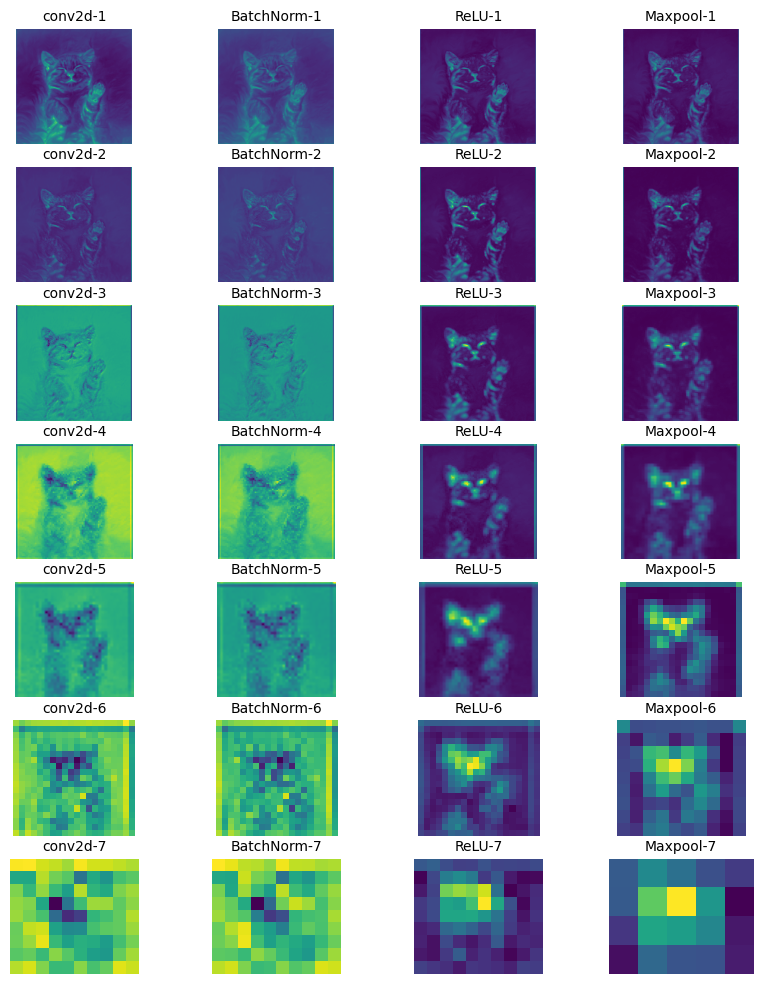

In [99]:
fig = plt.figure(figsize=(10, 50))
for i in range(len(processed)):
    plots = fig.add_subplot(len(processed), 4, i + 1)
    imgplot = plt.imshow(processed[i])
    plt.axis("off")
    plots.set_title(labels[i], fontsize=10)

plt.savefig('feature_maps.jpg', bbox_inches="tight", pad_inches=0)

# Individual Layer Visualization

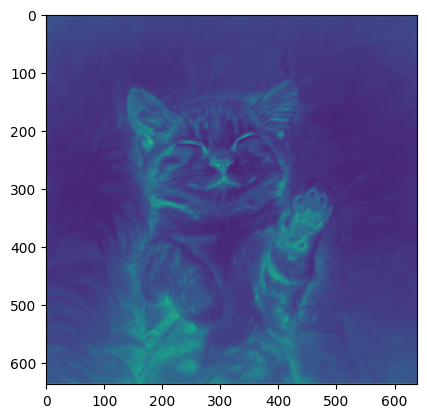

In [100]:
plt.imshow(processed[1])